# Týden 2
## 0. Obsah

- Příklady často používaných knihoven a práce s nimi
    - **Minule**: Numpy
    - Matplotlib
    - CV2 (OpenCV)
    - Pandas
    - PyGame
    - TkInter

- Představení projektu
    - Webová aplikace pro zobrazení a analýzu burzovních dat
    - Typické členení aplikací
        - Definice pojmů a jejich vztah
            - Backend
            - Frontend
            - Client
            - Server
            - API (a REST API)
            - GUI

## 1. Příklady často používaných knihoven a práce s nimi
### 1. Matplotlib

In [14]:
from matplotlib import pyplot as plt
import numpy as np

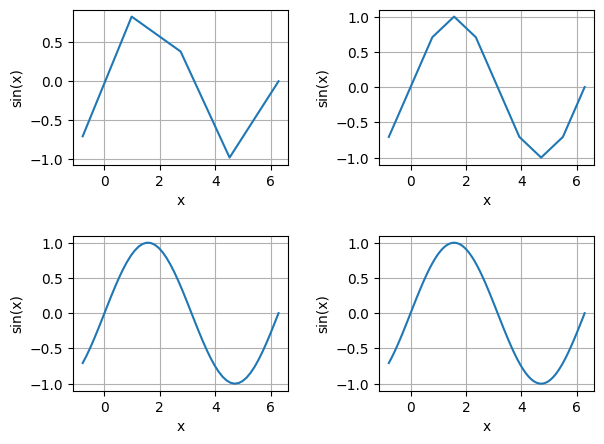

In [15]:
# Spojový graf:
x = lambda x: np.linspace(-np.pi/4, 2*np.pi, x)

fig, axes = plt.subplots(2, 2)
axes = np.array(axes).reshape(-1)

for i, x_ in enumerate([5, 10, 50, 100]):
    y = np.sin(x(x_))

    axes[i].plot(x(x_), y, label="sin(x)")
    axes[i].grid()
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("sin(x)")

plt.tight_layout(pad=2)
plt.show()

[[13 29 10 20]
 [26 46 14 11]
 [38 43 11 12]
 [20 39 15 43]]


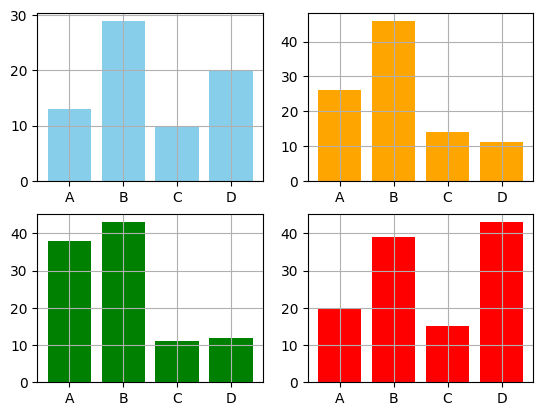

In [16]:
# Sloupcový graf:
kategorie = ["A", "B", "C", "D"]
hodnoty   = np.random.randint(10, 50, (4, 4))
barvy     = ["skyblue", "orange", "green", "red"]
print(hodnoty)

fig, axes = plt.subplots(2, 2)
axes = np.array(axes).reshape(-1)

for i, x_ in enumerate(hodnoty):
    axes[i].grid()
    axes[i].bar(kategorie, hodnoty[i], color=barvy[i])

plt.show()

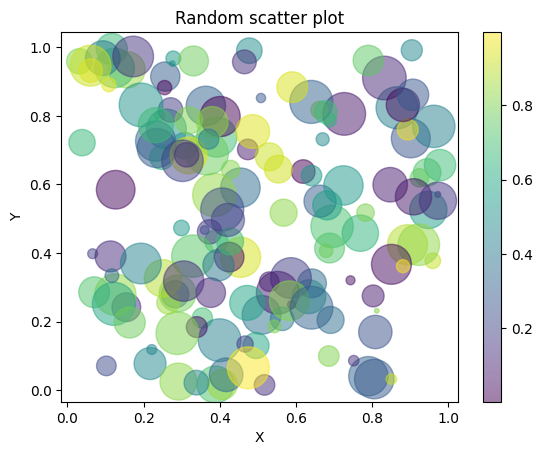

In [17]:
# Scatter-plot:
x = np.random.rand(150)
y = np.random.rand(150)
colors = np.random.rand(150)
sizes = np.random.rand(150) * 1000

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5)
plt.title("Random scatter plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

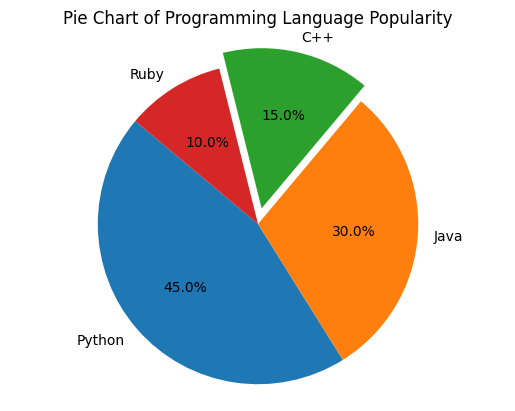

In [18]:
# Koláčový graf:
labels = ['Python', 'Java', 'C++', 'Ruby']
sizes = [45, 30, 15, 10]
explode = (0, 0, 0.1, 0)  # explode third slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Programming Language Popularity')
plt.show() 

[]

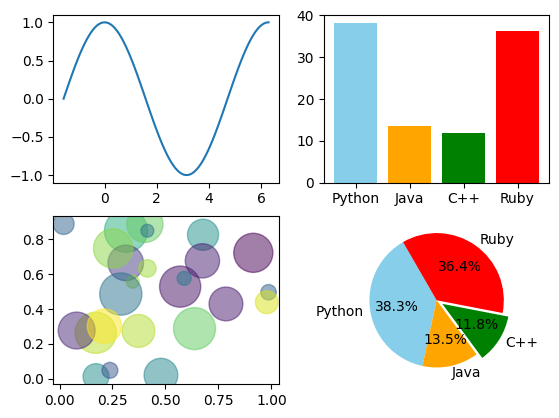

In [28]:
# Různé subplots
fig, axes = plt.subplots(2, 2)
axes = np.array(axes).reshape(-1)

x = np.linspace(-np.pi/2, 2*np.pi, 100)
axes[0].plot(x, np.cos(x))

sizes = np.random.rand(4)
sizes = sizes/sizes.sum() * 100
axes[1].bar(labels, sizes, color=barvy)

x = np.random.rand(25)
y = np.random.rand(25)
axes[2].scatter(x, y, c=np.random.rand(len(x)), s=np.random.rand(len(x))*1000, alpha=0.5)

axes[3].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=120, colors=barvy)

plt.plot()

### 2. OpenCV (CV2)

In [20]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

# Kód pro pohodlné prezentování obrázků:
def show(*images, scale=1, cols=2, titles=None):
    n_images = len(images)
    if n_images == 1: cols = 1
    rows = (n_images + cols - 1) // cols

    # Assume all images are roughly same size (or take the first as reference)
    height, width = images[0].shape[:2]
    
    # Set figure size to match the total pixel size exactly
    dpi = 100
    fig_width = (width * cols) / (dpi / scale)
    fig_height = (height * rows) / (dpi / scale)

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    axes = np.array(axes).reshape(-1)  # Flatten in case it's 2D array

    fig.patch.set_facecolor('none')

    for i, ax in enumerate(axes):
        ax.set_facecolor('none')
        ax.axis('off')

        if i < n_images:
            img_rgb = cv.cvtColor(images[i].astype(np.uint8), cv.COLOR_BGR2RGB)
            img_rgb = cv.resize(img_rgb, (int(width*scale), int(height*scale)), interpolation=cv.INTER_NEAREST)
            ax.imshow(img_rgb)
            if titles and i < len(titles):
                ax.set_title(titles[i], fontsize=8)
    
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.01, hspace=0.01)
    plt.show()

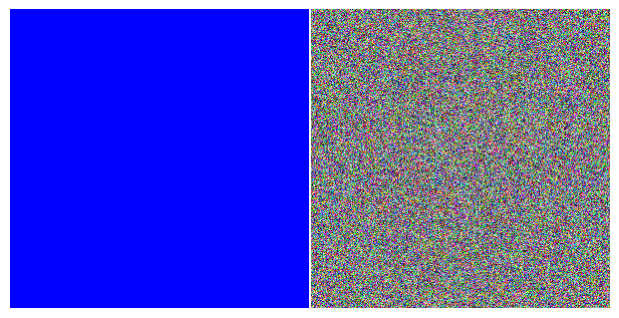

In [21]:
# Showing an image

# 3 channels of 8-bit color, 300x300 resolution, blank:
img = np.zeros((300, 300, 3), dtype=np.uint8)

# Fill with blue (BGR):
img[:] = (255, 0, 0)

# Fill with random noice
img2 = np.random.random((300, 300, 3)) * 255
show(img, img2, cols=2)

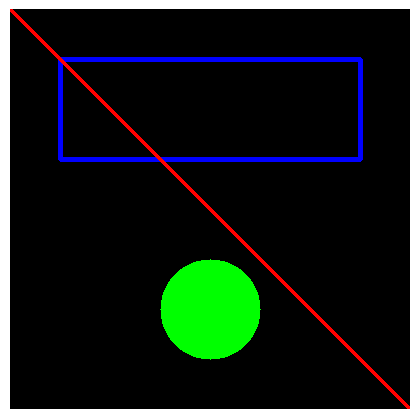

In [22]:
# drawing shapes:
img = np.zeros((400, 400, 3), dtype=np.uint8)

# Draw a blue rectangle
cv.rectangle(img, (50, 50), (350, 150), (255, 0, 0), thickness=3)

# Draw a green circle
cv.circle(img, (200, 300), 50, (0, 255, 0), thickness=-1)

# Draw a red line
cv.line(img, (0, 0), (400, 400), (0, 0, 255), thickness=2)

show(img, scale=1)

(512, 512, 3) (512, 512)


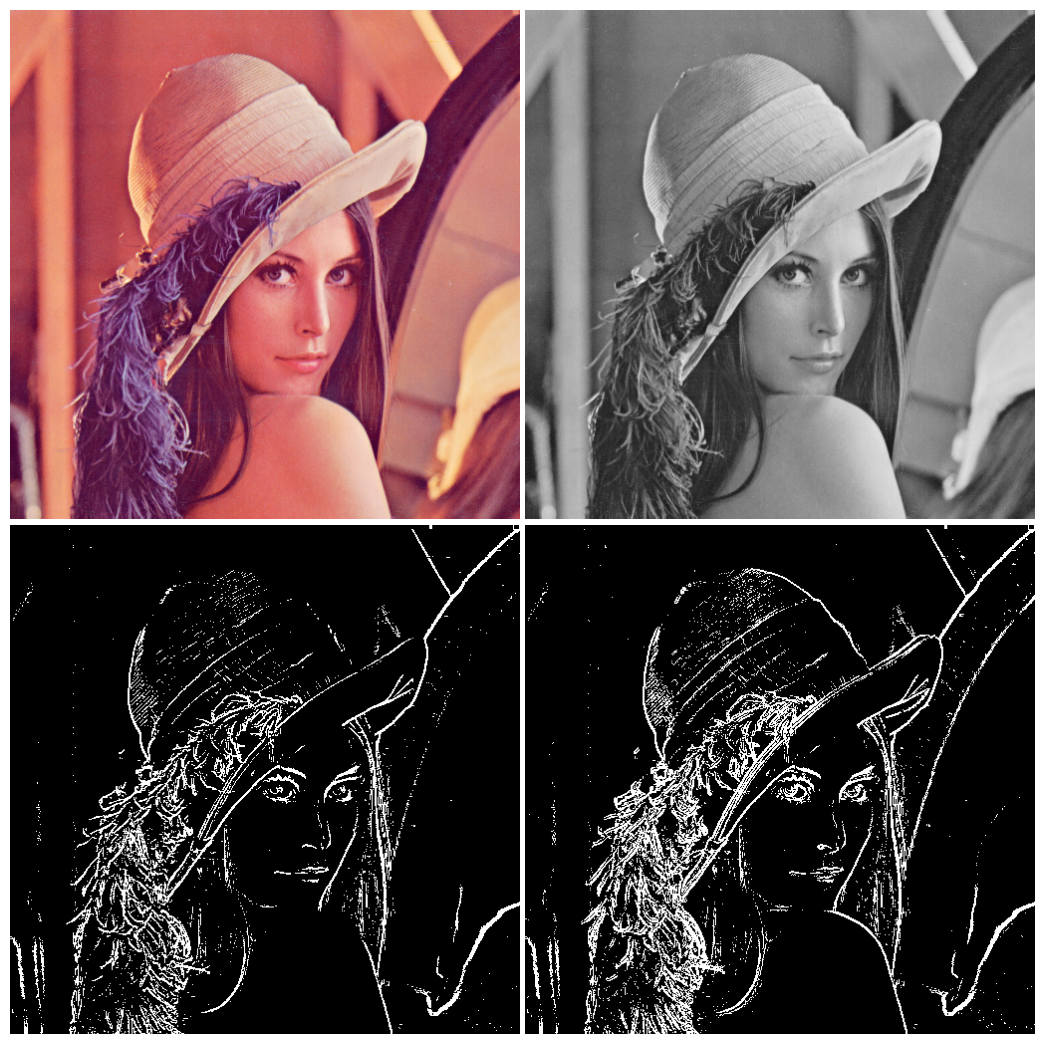

In [23]:
# loading image
img = cv.imread("images/lena_color_512.tif")
if img is None:
    print("None")
    exit()


# image processing:
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape, img_grayscale.shape)


 # edge detection:
def roberts(img, thresh, basic = False):
    mask_cardinal = np.array([[0, 1], [-1, 0]])
    mask_diagonal = np.array([[-1, 1]])

    g1 = cv.filter2D(img, ddepth=-1, kernel=mask_cardinal)
    g2 = cv.filter2D(img, ddepth=-1, kernel=np.rot90(mask_cardinal))

    g3 = cv.filter2D(img, ddepth=-1, kernel=mask_diagonal)
    g4 = cv.filter2D(img, ddepth=-1, kernel=mask_diagonal.T)

    edges1 = np.hypot(g1, g2) >= thresh
    edges2 = np.hypot(g3, g4) >= thresh

    edges = edges1 if basic else (edges1 | edges2)
    return edges.astype(np.uint8) * 255


img_rob_basic = roberts(img_grayscale, 20, basic=True)
img_rob = roberts(img_grayscale, 20)

show(img, img_grayscale, img_rob_basic, img_rob)

# Other edge detection kernels: Prewitt, Sobel, Kirsch, *Canny*

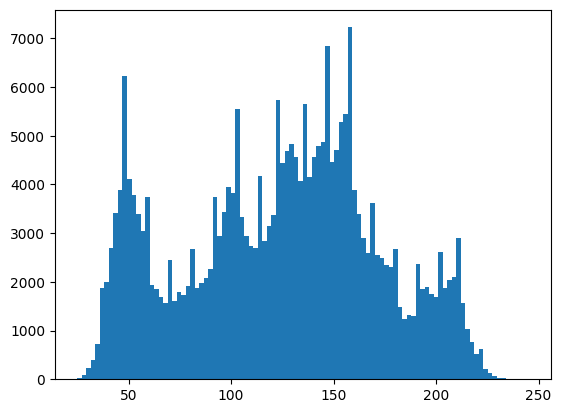

In [24]:
# histogram
plt.hist(img_grayscale.flatten(), 100)
plt.show()

### 3. Pandas
todo

### 4. Pygame
todo

### 5. TkInter
todo